In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/datasetpr.xls')
X1 = df.loc[:, ['Ws_2']].values
X2 = df.loc[:, ['DirpWave_1', 'WDir_2']].values
X3 = df.loc[:, ['Hs_pre']].values
y = df.loc[:, ['Hs']].values

scaler1 = StandardScaler().fit(X1)
X1 = scaler1.transform(X1)
scaler2 = StandardScaler().fit(X2)
X2 = scaler2.transform(X2)
scaler3 = StandardScaler().fit(X3)
X3 = scaler3.transform(X3)
scaler4 = StandardScaler().fit(y)
y = scaler4.transform(y)

X = np.hstack((X1, X2, X3))

X_test = X[20461:26307]
y_test = y[20461:26307].ravel()
X_train = np.concatenate((X[0:20460], X[26308:]), axis=0)
y_train = np.concatenate((y[0:20460], y[26308:]), axis=0).ravel()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# creating MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(7,15,1), activation='relu', solver='adam', max_iter=500)


In [ ]:
# fitting the MLPRegressor model on training data
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(7, 15, 1), max_iter=500)

In [ ]:
# calculating accuracy of the MLPRegressor model on testing data
accuracy = mlp_model.score(X_test, y_test)

# predicting on the testing set
y_pred = mlp_model.predict(X_test)

# calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# calculating the scatter index (SI)
mean = np.mean(X_test)
si = rmse / mean

# calculating the bias
bias = np.mean(y_pred) - np.mean(y_test)

print('Accuracy of MLPRegressor model:', accuracy)
print('RMSE of MLPRegressor model:', rmse)
print('SI of MLPRegressor model:', si)
print('Bias of MLPRegressor model:', bias)

Accuracy of MLPRegressor model: 0.9899092714720181
RMSE of MLPRegressor model: 0.10961934680421946
SI of MLPRegressor model: 4.54179182177024
Bias of MLPRegressor model: 0.008826045674126898


In [ ]:
import scipy.stats as stats
y_test = y_test.ravel()
y_pred = y_pred.ravel()

r, p_value = stats.pearsonr(y_test, y_pred)

print("Pearson correlation coefficient:", r)

Pearson correlation coefficient: 0.9951034898874821


In [ ]:
r_squared = r**2

print("R squared:", r_squared)

R squared: 0.9902309555862462


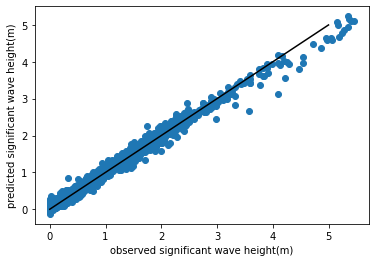

In [ ]:
import matplotlib.pyplot as plt
y_test2=scaler4.inverse_transform(y_test.reshape(-1,1))
y_pred2=scaler4.inverse_transform(y_pred.reshape(-1,1))
plt.scatter(y_test2, y_pred2)

# set the x and y axis labels
plt.xlabel('observed significant wave height(m)')
plt.ylabel('predicted significant wave height(m)')

x=np.linspace(0,5,100)
y=x
plt.plot(x, y,color='k')
# display the plot
plt.show()

